Данные о съедобности грибов для части заданий. Взяты [отсюда](https://www.kaggle.com/uciml/mushroom-classification#mushrooms.csv), все категориальные переменные были закодированы числами для простоты.

In [20]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Задание 1


Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

```python
RandomForestClassifier(random_state=0)
```
Параметры для выбора -

- n_estimators: от 10 до 50 с шагом 10
- max_depth: от 1 до 12 с шагом 2
- min_samples_leaf: от 1 до 7
- min_samples_split: от 2 до 9 с шагом 2

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [4]:
# Загрузка данных (верные ответы в поле class)
dt_mush = pd.read_csv('data/training_mush.csv')

X = dt_mush.drop(['class'], axis=1)
y = dt_mush['class']

In [5]:
dt_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [12]:
# Объявляем классификатор и параметры для перебора
clf_rf = RandomForestClassifier(random_state=0)

parametrs = {"n_estimators": range(10, 50, 10), 
             "max_depth": range(1, 12, 2),
             "min_samples_leaf": range(1, 7),
             "min_samples_split": range(2, 9, 2)}

In [13]:
# Запускаем обучение
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [19]:
# Получаем лучшие параметры от лучшей обученной модели.
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

# Задание 2

Выберите правильные утверждения о важности фичей для нашего классификатора

- [] habitat > stalk-shape > odor
- [] stalk-color-below-ring > stalk-root > odor
- [x] odor > population > gill-attachment
- [] cap-surface > odor > gill-attachment 

In [22]:
best_clf = grid_search_cv_clf.best_estimator_

In [23]:
feature_importances = best_clf.feature_importances_

In [29]:
feature_importances_df = pd.DataFrame({"features": list(X), "feature_importances": feature_importances})\
    .sort_values("feature_importances", ascending=False)

In [30]:
feature_importances_df

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


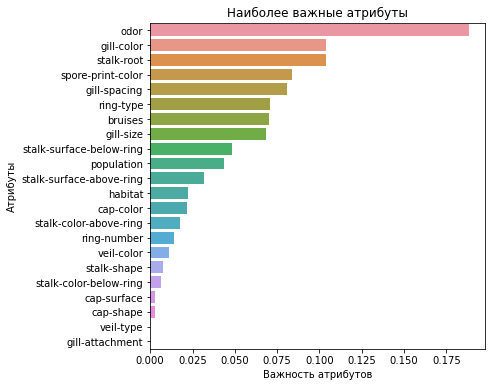

In [31]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [33]:
v = ['cap-surface > odor > gill-attachment',
     'odor > population > gill-attachment',
     'stalk-color-below-ring > stalk-root > odor',
     'habitat > stalk-shape > odor']

for var in v:
    feats = [s.strip() for s in var.split('>')]
    imps = [feature_importances_df[feature_importances_df.features == feats[i]]['feature_importances'].item() for i in (0, 1, 2)]
    print('+', var) if imps[0] > imps[1] > imps[2] else print('-', var)

- cap-surface > odor > gill-attachment
+ odor > population > gill-attachment
- stalk-color-below-ring > stalk-root > odor
- habitat > stalk-shape > odor


# Задание 3

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

 
Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [41]:
dt_mush_test = pd.read_csv('data/testing_mush.csv')

In [42]:
predictions = grid_search_cv_clf.predict(dt_mush_test)

In [44]:
print(np.sum(predictions == 1))

976


# Задание 4

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

In [64]:
# для открытия запароленого zip архива:
import zipfile


z = zipfile.ZipFile("data/testing_y_mush.csv.zip")

# метод namelist(), возвращает список имен файлов
txtfile = z.namelist()

# пароль с прошлого степа 
password = 'Cool!Move_forward!'

# Так как txtfiles - это список (type: 'list'), 
# а методу open() необходимо передать в качестве параметра наименование 1 файла, 
# то следует указать номер элемента списка.
y_true = pd.read_csv(z.open(txtfile[0], "r", pwd=password.encode('cp850', 'replace')))

In [71]:
from sklearn.metrics import confusion_matrix


y_pred = predictions
cm = confusion_matrix(y_true, y_pred)

<AxesSubplot:>

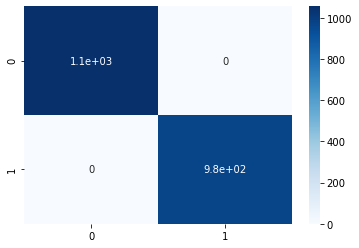

In [72]:
sns.heatmap(cm, annot=True, cmap="Blues")

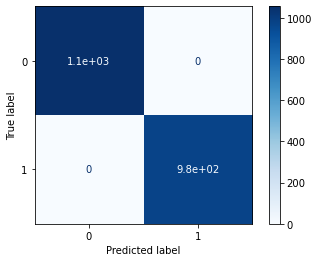

In [76]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(best_clf, dt_mush_test, y_true, cmap=plt.cm.Blues, values_format='.2g')

# Задание 5

Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [78]:
# подключаем данные 
dt_invasion = pd.read_csv('data/invasion.csv')

In [84]:
# посмотрим на них
dt_invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [85]:
# разделим наши данные
X = dt_invasion.drop(['class'], axis=1)
y = dt_invasion['class']

In [97]:
# настроим параметры для случайного леса(взяли данные их грибов)
clf_rf = RandomForestClassifier()

parametrs = {"n_estimators": range(10, 50, 10), 
             "max_depth": range(1, 12, 2),
             "min_samples_leaf": range(1, 7),
             "min_samples_split": range(2, 9, 2)}

In [98]:
# обучение 
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [99]:
# подключаем другие данные 
dt_operative_information = pd.read_csv('data/operative_information.csv')

In [100]:
dt_operative_information.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [101]:
# сделаем предсказание 
predictions = grid_search_cv_clf.predict(dt_operative_information)

In [102]:
# из numpy array  превратим в пандовскую серию 
s = pd.Series(predictions)

In [103]:
s.groupby(s).count()

cruiser      230
fighter      675
transport    595
dtype: int64

# Задача 6

Какая переменная оказалась самой важной для классифицирования кораблей?

In [104]:
best_clf = grid_search_cv_clf.best_estimator_

feature_importances = best_clf.feature_importances_

feature_importances_df = pd.DataFrame({"features": list(X), "feature_importances": feature_importances})\
    .sort_values("feature_importances", ascending=False)

feature_importances_df

,features,feature_importances
5,volume,0.471451
2,speed,0.175946
0,g_reflection,0.165244
3,brightness,0.154583
1,i_reflection,0.032775
4,time_of_observance,0.000000


# Задача 7

Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [105]:
dt_space_can_be_a_dangerous_place = pd.read_csv('data/space_can_be_a_dangerous_place.csv')

In [106]:
dt_space_can_be_a_dangerous_place.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


Самое простое, что пришло в голову - это построить корреляционную матрицу:
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Blues)

В итоге видим, что опасность имеет более-менее ощутимую положительную корреляцию с планемо и присутствием жукеров в системе, но не с черными дырами.

<AxesSubplot:>

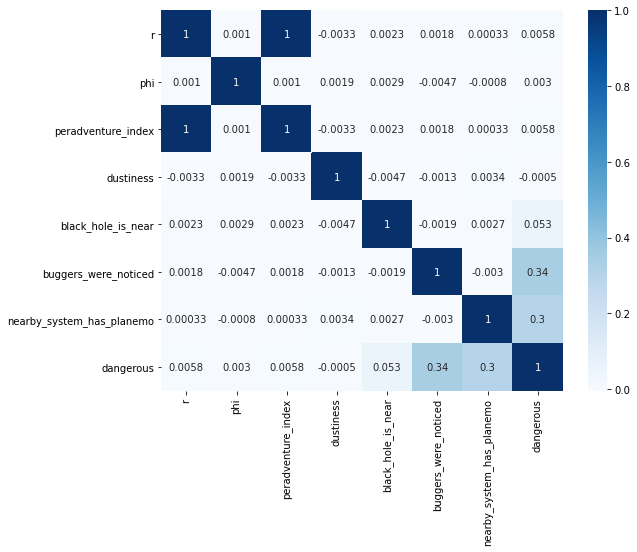

In [111]:
plt.figure(figsize=(9,7))

cr = dt_space_can_be_a_dangerous_place.corr()

sns.heatmap(cr, annot=True, cmap="Blues")

In [122]:
df_train = dt_space_can_be_a_dangerous_place
total = len(df_train)
print(f'Строк с данными : {total}')

print(f'Влияние жуков : {len(df_train.query("dangerous > 0 & buggers_were_noticed > 0")) / total * 100}%')

print(f'Влияние планемо : {len(df_train.query("dangerous > 0 & nearby_system_has_planemo > 0")) / total * 100}%')

print(f'Влияние близости к черной дыре : {len(df_train.query("dangerous > 0 & black_hole_is_near > 0")) / total * 100}%')

Строк с данными : 100000
Влияние жуков : 86.5%
Влияние планемо : 90.202%
Влияние близости к черной дыре : 10.414%
